## Data Modelling using Neural Networks (class 5)

## Dictionary:
* fitting - ajuste
* justification - justificativa
* loss function - funcion de perdida
* layer - capa
* recognition - reconocimiento
* weigts - ponderaciones, peso

### this class is not an introducion to Neural Network
* this class is a justification why one needs to understand other things before using NN:
  * Linear regression
  * Logistic regression
  * Linear algebra
  * Metrics
  * loss funcions
  * mean squared error MSE

Part of the course was from the beginning including regression... linear and logistic.

    .
    .
    .
    .
    2. Regression
        -Least squared method
        -linear regression (uni and multivariable)
        -gradient descent
	    -logistic regression
        - overfitting...
     .
     .
     .
     .

## There is no magic in how the NN works, 
complexity? .... oh yes!

### classical computing
* inputs                    # known
* rule (code or algorithm)  # known
* outputs                   # unknown

## machine learning
* input     # known
* rule      # this is to be found
* output    # known


<img src="imgs/rule.png" width="600" />

### Neural Network (Deep neural network has this misterious structure)


# WHY do we need to study regression?

<img src="imgs/deep_neural_network.png" width="600" /> 

* there are neural networks that have over 100 hidden layers (whatever it means)
* they are better than the humans in recognizing objects
* but there is also possible to build a simple neural network that has one one neuron and one layer!
* how would that NN work, what problem can you solve it with it
* the principle of operation is the same in both cases

* some people say that Machine Learning is a glorified statistics... (?)

### Lets try something simple:

In [ ]:
0   -> 32
8   -> 46.4
15  -> 59
22  -> 71.6
100 -> ?

In [ ]:
# the example above is the conversion between Celsius and Farenheit

In [2]:
C=22
F = C * 1.8 + 32
print(F)

71.6


# Can we construct a neural network that can solve such a simple problem? YES.

Such neural network would have 
* an input single digit
* an output single digit

<img src="imgs/NN_bias.png" width="600" /> 

<img src="imgs/NN_CF.png" width="400" /> 

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense
import numpy as np
import matplotlib.pyplot as plt

In [18]:
celsius   = np.array([-40,10,0,8,15,22,38])
farenheit = np.array([-40,50,32,46.4,59,71.6,100.4])
farenheit.shape

(7,)

In [19]:
input_layer = InputLayer(input_shape=1)
dense_layer = Dense(units=1)
dense_layer2 = Dense(units=3)
dense_layer2 = Dense(units=5)

In [20]:
model = Sequential([input_layer,
                    dense_layer])

In [32]:
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.1))

In [60]:
history = model.fit(celsius,farenheit,epochs=500,verbose=False)

In [37]:
history.history.keys()

dict_keys(['loss'])

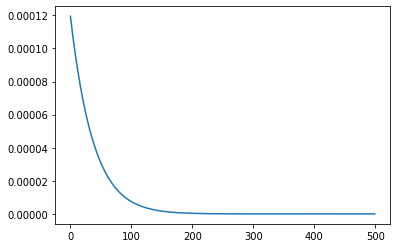

In [38]:
fig,ax = plt.subplots(1,1)
ax.plot(history.history['loss'])

In [39]:
model.predict([100,150,200])

array([[212.00002],
       [302.00006],
       [392.00006]], dtype=float32)

In [40]:
dense_layer.get_weights()

[array([[1.8000005]], dtype=float32), array([31.999954], dtype=float32)]

In [42]:
w1 = dense_layer.get_weights()[0]
bias = dense_layer.get_weights()[1]

In [43]:
C=100
F=C*w1+bias
print(F)

[[212.00002]]


## We created a simple neural network that solves a conversion problem
<img src="imgs/NN_CF.png" width="400" /> 

## But wait a second this can be also solved much simpler way...
* by a regression/fitting method

In [ ]:
import numpy as np


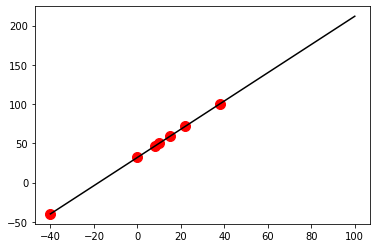

In [55]:
celsius   = np.array([-40,10,0,8,15,22,38])
farenheit = np.array([-40,50,32,46.4,59,71.6,100.4])

def my_function(x,a1,a0):
    return a1*x + a0

xdata = celsius
ydata = farenheit
p0 = np.array([1.0,1.0])
from scipy.optimize import curve_fit
popt,pcov = curve_fit(my_function,xdata,ydata,p0,method='lm') 

xfit = np.linspace(-40,100,100)
yfit = my_function(xfit,popt[0],popt[1])

fig,ax = plt.subplots(1,1)
ax.plot(xdata,ydata,'.r',marker='o',ms=10)
ax.plot(xfit,yfit,'-k')

# So part of the NN works like a regressor

### If one takes a single summation and single bias

<img src="imgs/NN_bias.png" width="600" /> 

### Many summations and biases

<img src="imgs/many_weights_biases.png" width="600" />

## This monster is more complex but the prinicple is the same?

<img src="imgs/deep_neural_network.png" width="600" /> 


*** enourmous polynomial with an activation funcion ***

#### features : input (image of apple, mango, banana)
#### labels   : outputs (1, 0, 0), (0,1,0), (0,0,1)
#### example  : image of an apple + apple

## So the second part after the regression part is the activation funcion which is:
... logistic regression!

## Adding more layers makes the problem unreadable... but the solution is correct

In [85]:
input_layer = InputLayer(input_shape=1)
dense_layer = Dense(units=1)
dense_layer2 = Dense(units=2)
dense_layer3 = Dense(units=1)

In [86]:
model = Sequential([input_layer,
                   dense_layer,
                   dense_layer2,
                   dense_layer3])

In [87]:
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(0.1))

In [88]:
history = model.fit(celsius,farenheit,epochs=500,verbose=False)

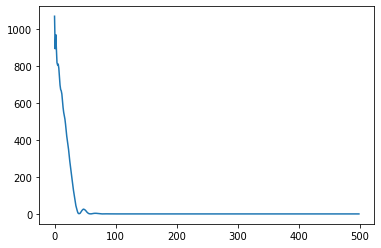

In [89]:
fig,ax = plt.subplots(1,1)
ax.plot(history.history['loss'])

In [78]:
model.predict([100,150,200])

array([[212.],
       [302.],
       [392.]], dtype=float32)

In [75]:
dense_layer2.get_weights()

[array([[0.02122646, 0.95676965]], dtype=float32),
 array([ 5.7169685, -5.351739 ], dtype=float32)]

## The conclusion is, FOR A PROBLEM AS SIMPLE AS DIGIT-TO-DIGIT CONVERSION THE NEURAL NETWORK SIMPLIFIED ITSELF TO REGRESSION !!!

So we need to study
  * Linear regression
  * Logistic regression
  * Linear algebra
  * Metrics
  * loss funcions
  * MSE